# Sales Prediction System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from math import factorial as f
import scipy.stats as stats
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib.font_manager import FontProperties
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Function to import the Dataset

### Task 1 - Load the data

In [2]:
def importdata():
    # Write here
    test_df = pd.read_csv('test.csv')
    train_df = pd.read_csv('train.csv')
    store_df = pd.read_csv('store.csv')
    # joining the store and train csv vifles into 1 dataframe
    train_store_df = pd.merge(train_df,store_df,how='inner',on='Store')
    return train_store_df

df = importdata()

In [3]:
def basic_info(df):
    '''checking basic information & shape about the dataframe'''
    print("Shape of the dataset",df.shape)
    print("*"*30)
    print(df.info())
    
basic_info(df)

Shape of the dataset (1017209, 18)
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  Comp

* There are around 1 million instances and 18 features when joined with store data
* There seems to be no null values from train data but there are some null values in train_store_df, CompetitionOpenSinceMonth and CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval              
* StateHoliday is of type object but in the above sample we can see that there are also numeric values. We will have to check this column and fix it
* "Date" column is like the index for our dataset, we will drop this feature, but we can try to create new features from it.

In [4]:
## train data set
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [5]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [6]:
df['StateHoliday'].value_counts()


0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

<AxesSubplot:ylabel='StateHoliday'>

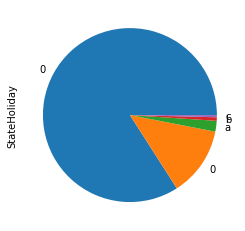

In [7]:
df['StateHoliday'].value_counts().plot.pie()


* we can see there state holiday is a categorical value by the data dictionary in the dataset.
* a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* we can observe the same value 0 being displayed on different categories even though they represent same category 0 None
* we have to clean it

In [8]:
df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

<AxesSubplot:ylabel='Open'>

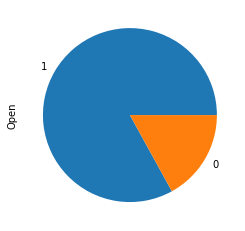

In [9]:
df['Open'].value_counts().plot.pie()

In [10]:
df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

* we can see there are much more data for a , c and d type shops and very less b type shops

In [12]:
df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

* we can see the assortment level of a = basic and c = extended are having similar counts
* also the assortment level b are very few

* Store Type , Assortment and PromoInterval are of type object and could be categprical values
* From Data Dictionary we could see the following details about the store data set
* Store Type : a, b, c, d
* Assortment : a = basic, b = extra, c = extended
* PromoInterval is not a categorical value but has consecutive months, which may be similar accross data. May be the promos are applied at regular interval accross the store. This needs to be explored

## Function to visualize the features

### Task-2: Visualize the data

#### Univariate Analysis

In [13]:
def visualize_numeric(df):
    #visualize the numeric fields
    numeric_fields = ['Store','DayOfWeek','Customers','Open','Promo']
    for field in numeric_fields:
        plt.title(field)
        df[field].hist()
        plt.figure (figsize = (6,3))
    

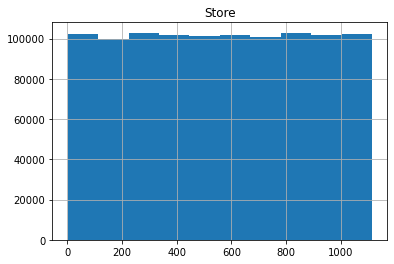

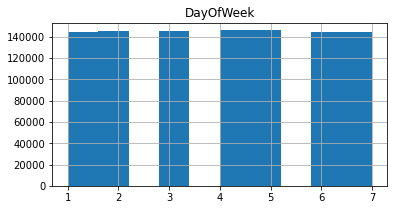

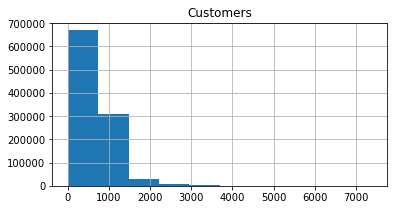

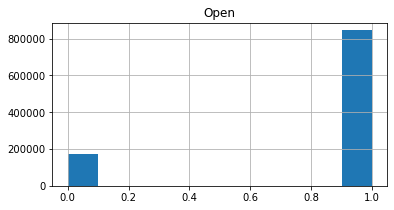

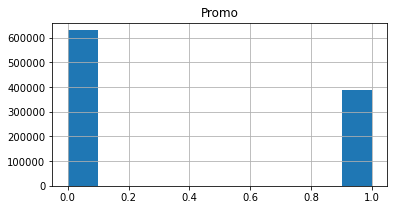

<Figure size 432x216 with 0 Axes>

In [14]:
visualize_numeric(df)

* We can see the store numbers are continuous in nature
* We can see the customers are continuous
* Also day of week can been seen as categorical in nature. this suggest some seasonlity in the data

#### Bi-Variate Analysis

* Sales is a target field, which we are trying to predict so we have to see the bivariate analyis of fields against Sales field

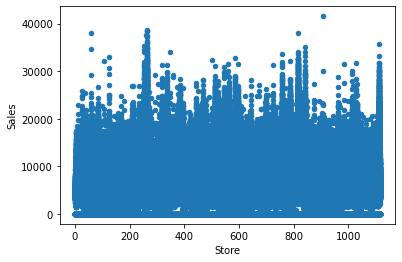

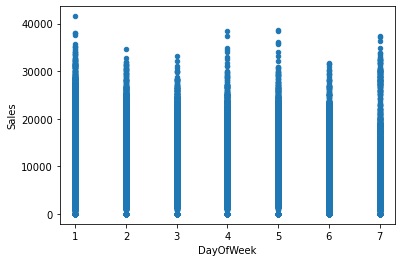

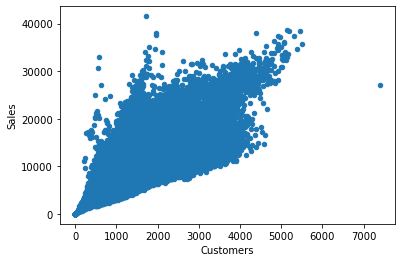

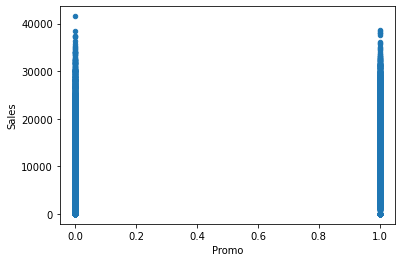

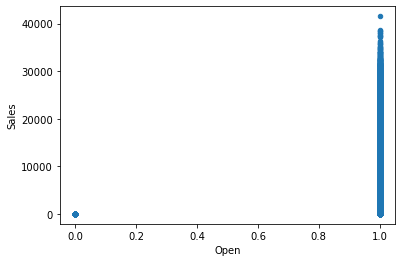

In [15]:
numeric_fields = ['Store','DayOfWeek','Customers','Promo','Open']
for field in numeric_fields:
    df.plot.scatter(x=field,y="Sales")
    plt.show()

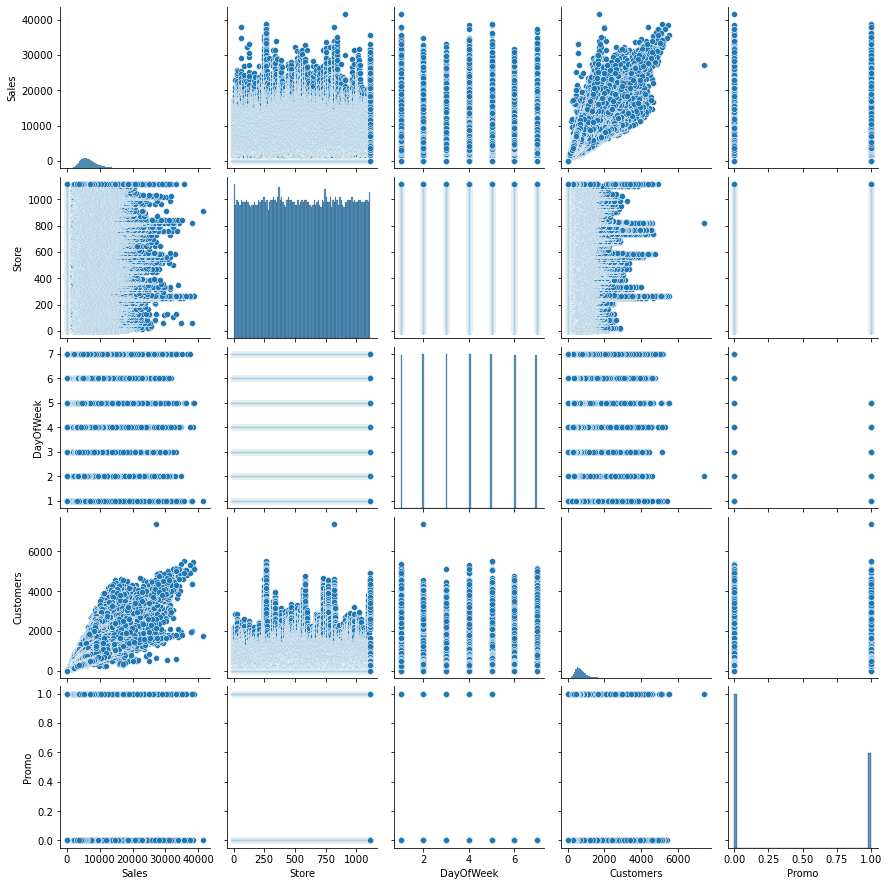

In [16]:
sns.pairplot(data = df, vars=['Sales','Store','DayOfWeek','Customers','Promo'])
plt.show()

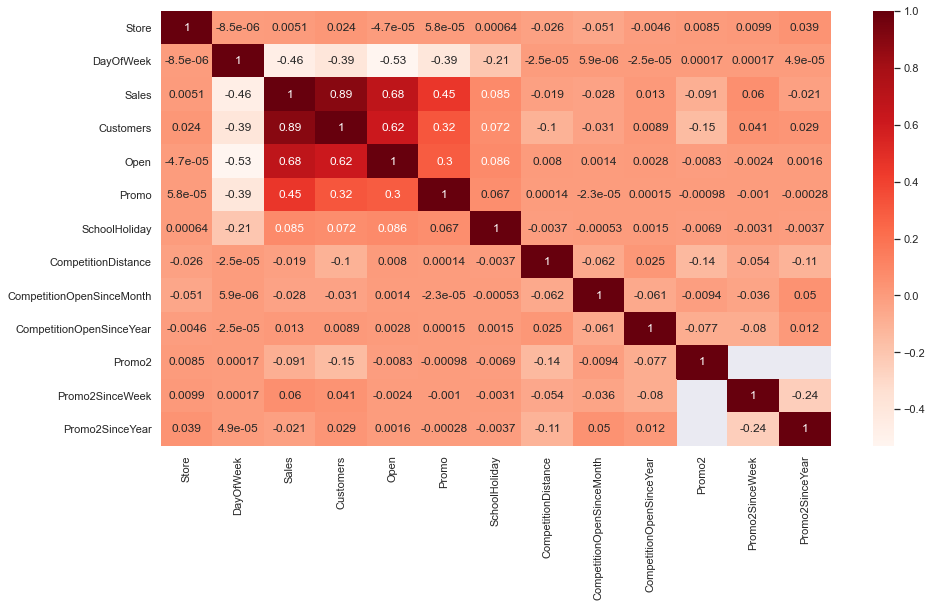

In [17]:

df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')

plt.show()

* we can see there is a positive correlation between Sales and Customers, Open, Promo, School Holiday, Assortment
* we see strong correlation with Customers (0.89), Open (0.68), Promo (0.45), Assortment (0.07)  and Promo2sinceweek

In [18]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


## Function to preprocess the data

### Task-3: Preprocess the data

In [19]:
def data_preprocessing(df):

    ## remove duplicates
    df.drop_duplicates()
    
    ## Map holiday
    holiday_map = {'0':0, 'a':1, 'b':2, 'c':3, 0:0}

    ## Map store type
    storetype_map = {'a':0, 'b':1, 'c':2, 'd':3}
    
    ## Map assortment type
    assortmenttype_map = {'a':0, 'b':1, 'c':2}
    
    ## Mapping categorical to numerical values
    df['StateHoliday'] = df['StateHoliday'].map(holiday_map)
    df['StoreType'] = df['StoreType'].map(storetype_map)
    df['Assortment'] = df['Assortment'].map(assortmenttype_map)


    ### Removing Null values
    df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)
    df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].mode()[0])
    df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0])
    df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0])


    # drop unnecesary features
    df.drop(labels=['Date','Store','Promo2SinceYear','PromoInterval','Customers','CompetitionOpenSinceYear'], axis=1, inplace=True)


    return df

In [20]:
dff = data_preprocessing(df)

In [21]:
# Preprocessed data
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Sales                      1017209 non-null  int64  
 2   Open                       1017209 non-null  int64  
 3   Promo                      1017209 non-null  int64  
 4   StateHoliday               1017209 non-null  int64  
 5   SchoolHoliday              1017209 non-null  int64  
 6   StoreType                  1017209 non-null  int64  
 7   Assortment                 1017209 non-null  int64  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  Promo2                     1017209 non-null  int64  
 11  Promo2SinceWeek            1017209 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 100.9 MB


In [22]:
dff.head()

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek
0,5,5263,1,1,0,1,2,0,1270.0,9.0,0,0.0
1,4,5020,1,1,0,1,2,0,1270.0,9.0,0,0.0
2,3,4782,1,1,0,1,2,0,1270.0,9.0,0,0.0
3,2,5011,1,1,0,1,2,0,1270.0,9.0,0,0.0
4,1,6102,1,1,0,1,2,0,1270.0,9.0,0,0.0


## Function to split the dataset

### Task 4: Split the data

In [23]:
def splitdataset(data):
    # Separating the target variable
    Y = data['Sales']
    X = data.drop('Sales', 1)

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

    return X_train, X_test, y_train, y_test

In [24]:
# Let's verify
X_train, X_test, y_train, y_test = splitdataset(dff)
X_train.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek
817013,4,1,1,0,0,2,2,3290.0,1.0,1,5.0
861474,1,1,0,0,0,0,0,2220.0,12.0,1,14.0
772779,5,1,0,0,0,0,2,370.0,7.0,1,14.0
81436,6,1,0,0,0,0,0,330.0,11.0,0,0.0
862893,7,0,0,0,0,0,0,460.0,3.0,1,13.0


In [25]:
X_test.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek
76435,1,1,0,0,1,0,2,11810.0,8.0,0,0.0
923026,6,1,0,0,0,0,0,630.0,2.0,1,31.0
731180,5,1,0,0,0,3,0,1760.0,9.0,1,10.0
790350,4,1,1,0,0,3,2,21810.0,9.0,0,0.0
252134,6,1,0,0,0,0,2,9260.0,2.0,0,0.0


In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712046, 11), (305163, 11), (712046,), (305163,))

# Random Forest

## Function to build a Random Forest model

### Task 5: Train the model

In [27]:
def train_using_ensemble(X_train, y_train):
    # Instantiate the model
    #Todo
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train,y_train)
    return rf

In [28]:
model = train_using_ensemble(X_train, y_train)


In [29]:
model

RandomForestRegressor()

## Make predictions

### Task 6: Make the predictions and evalute the model (Already written)

In [30]:
# Function to make predictions
def prediction(X_train, X_test, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return y_train_pred, y_test_pred


# Function to calculate accuracy
def cal_accuracy(y_train, y_test, y_train_pred, y_test_pred):
    print("Train R2_score",r2_score(y_train,y_train_pred))
    print("Test R2_score",r2_score(y_test,y_test_pred))

In [31]:
# Prediction
y_train_pred, y_test_pred = prediction(X_train, X_test, model)
print("*"*10)
    
#Evaluate the model
cal_accuracy(y_train, y_test, y_train_pred, y_test_pred)
print("Model evaluation done successfully")

**********
Train R2_score 0.9193351981159013
Test R2_score 0.9110084659041521
Model evaluation done successfully


## Function to explain the model

### Task 7: Check feature importance

In [32]:
def explainable_DT(model, X):

    importances = model.feature_importances_ 
    # return the indices that would sort the importance, decreasing
    indices = np.argsort(importances)[::-1]
    
    Features = X.columns
    for f in range(11):
        print("%d. feature %d :%s (%f)" % (f + 1, indices[f],Features[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    # the most important feature 'open' is left out in the plot to make it easier to see the other features
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(1,10), importances[indices[range(1,10)]]) 
    plt.xlim([-1, 10])
    plt.show()

1. feature 1 :Open (0.498395)
2. feature 7 :CompetitionDistance (0.221176)
3. feature 2 :Promo (0.079377)
4. feature 8 :CompetitionOpenSinceMonth (0.065036)
5. feature 0 :DayOfWeek (0.042064)
6. feature 10 :Promo2SinceWeek (0.034864)
7. feature 5 :StoreType (0.026638)
8. feature 6 :Assortment (0.019358)
9. feature 9 :Promo2 (0.007705)
10. feature 4 :SchoolHoliday (0.004436)
11. feature 3 :StateHoliday (0.000951)


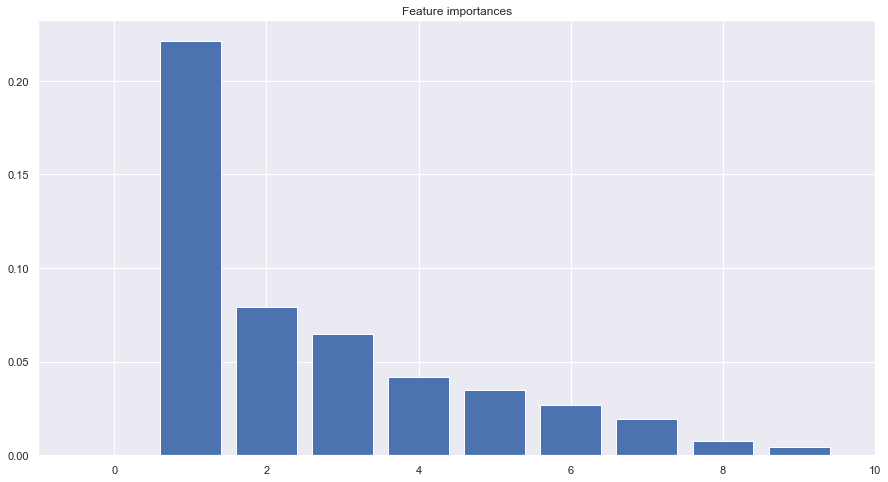

In [33]:
explainable_DT(model, X_train)

## Driver Code for Random Forest 

### Prediction on original data

### Task 8: Run the drive code

**********
Train R2_score 0.9193369831410173
Test R2_score 0.9110014004297519
Model evaluation done successfully
1. feature 1 :Open (0.498578)
2. feature 7 :CompetitionDistance (0.221729)
3. feature 2 :Promo (0.079295)
4. feature 8 :CompetitionOpenSinceMonth (0.064408)
5. feature 0 :DayOfWeek (0.042046)
6. feature 10 :Promo2SinceWeek (0.035384)
7. feature 5 :StoreType (0.026880)
8. feature 6 :Assortment (0.019378)
9. feature 9 :Promo2 (0.006905)
10. feature 4 :SchoolHoliday (0.004470)
11. feature 3 :StateHoliday (0.000926)


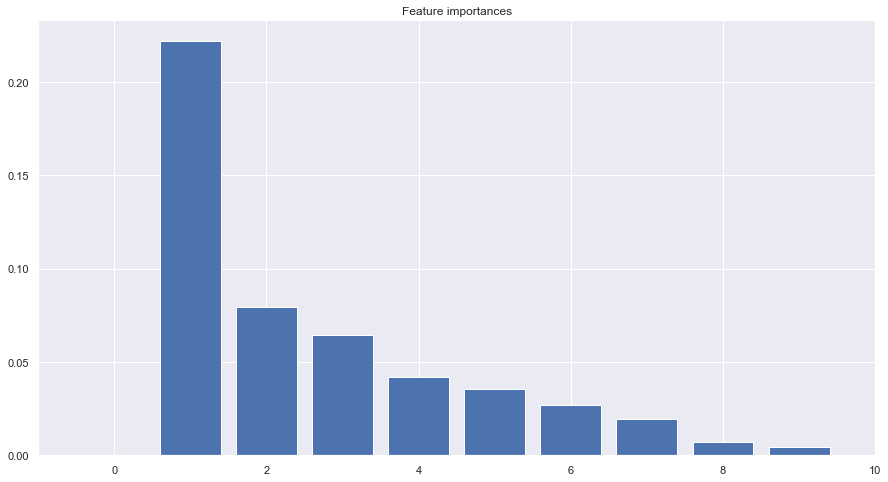

Time taken in seconds: 337.84377121925354


In [34]:
# Driver code
import time
def main():

  ## Todo
    
    # Load the data 
    df = importdata()
    
    # Preprocess the data
    dff = data_preprocessing(df)
    
    # Split the data
    X_train, X_test, y_train, y_test = splitdataset(dff)

    # Train the model using train function
    model = train_using_ensemble(X_train, y_train)
    
    # Prediction
    y_train_pred, y_test_pred = prediction(X_train, X_test, model)
    print("*"*10)
    
    #Evaluate the model
    cal_accuracy(y_train, y_test, y_train_pred, y_test_pred)
    print("Model evaluation done successfully")
    
    ## Check feature importance
    explainable_DT(model, X_train)

# Calling main function

t0 = time.time()
if __name__ == "__main__":
    main()
t1 = time.time()   
total = t1-t0
print("Time taken in seconds:",total)

### Task 9: Write your inferences

* We could observe the most important features to determine the sales are Open, CompetitionDistance, Promo, CompetitionOpenSinceMonth, DayOfWeek
* Application of Promo2 does not have much impact on the sales